In [1]:
import mglearn

In [41]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge, LinearRegression
import pandas as pd

In [5]:
### 한글 폰트 설정
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform

path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline

In [6]:
boston = load_boston()

In [23]:
print(type(boston.data))

<class 'numpy.ndarray'>


In [13]:
df_boston = pd.DataFrame(boston.data, columns = boston.feature_names)
df_boston['price'] = pd.Series(boston.target)
df_boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'price'],
      dtype='object')

In [14]:
#입력과 출력 = x,y
x= df_boston.loc[:,'CRIM':"LSTAT"]
y = df_boston['price']

x.shape

(506, 13)

In [25]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [27]:
#데이터 정규화 : min~ max = 0~!
nor_X = MinMaxScaler().fit_transform(x)
print(nor_X)

[[0.00000000e+00 1.80000000e-01 6.78152493e-02 ... 2.87234043e-01
  1.00000000e+00 8.96799117e-02]
 [2.35922539e-04 0.00000000e+00 2.42302053e-01 ... 5.53191489e-01
  1.00000000e+00 2.04470199e-01]
 [2.35697744e-04 0.00000000e+00 2.42302053e-01 ... 5.53191489e-01
  9.89737254e-01 6.34657837e-02]
 ...
 [6.11892474e-04 0.00000000e+00 4.20454545e-01 ... 8.93617021e-01
  1.00000000e+00 1.07891832e-01]
 [1.16072990e-03 0.00000000e+00 4.20454545e-01 ... 8.93617021e-01
  9.91300620e-01 1.31070640e-01]
 [4.61841693e-04 0.00000000e+00 4.20454545e-01 ... 8.93617021e-01
  1.00000000e+00 1.69701987e-01]]


In [34]:
import numpy as np
np.min(nor_X)

0.0

In [37]:
ex_X = PolynomialFeatures(degree = 2, include_bias = False).fit_transform(nor_X)
print(ex_X.shape, y.shape)

(506, 104) (506,)


In [39]:
print(pd.DataFrame(ex_X))

          0     1         2    3         4         5         6         7    \
0    0.000000  0.18  0.067815  0.0  0.314815  0.577505  0.641607  0.269203   
1    0.000236  0.00  0.242302  0.0  0.172840  0.547998  0.782698  0.348962   
2    0.000236  0.00  0.242302  0.0  0.172840  0.694386  0.599382  0.348962   
3    0.000293  0.00  0.063050  0.0  0.150206  0.658555  0.441813  0.448545   
4    0.000705  0.00  0.063050  0.0  0.150206  0.687105  0.528321  0.448545   
..        ...   ...       ...  ...       ...       ...       ...       ...   
501  0.000633  0.00  0.420455  0.0  0.386831  0.580954  0.681771  0.122671   
502  0.000438  0.00  0.420455  0.0  0.386831  0.490324  0.760041  0.105293   
503  0.000612  0.00  0.420455  0.0  0.386831  0.654340  0.907312  0.094381   
504  0.001161  0.00  0.420455  0.0  0.386831  0.619467  0.889804  0.114514   
505  0.000462  0.00  0.420455  0.0  0.386831  0.473079  0.802266  0.125072   

          8         9    ...       94        95        96      

In [42]:
# feature를 많이 만든다음 계산한 것 -> 과대적합 발생
X_train, X_test, y_train, y_test = train_test_split(ex_X, y, random_state = 42)
ex_model = LinearRegression().fit(X_train,y_train)
print(ex_model.score(X_train,y_train), ex_model.score(X_test, y_test))

0.9448313975211593 0.7758378393351696


In [44]:
#기존 모델
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 42)
ex_model = LinearRegression().fit(X_train,y_train)
print(ex_model.score(X_train,y_train), ex_model.score(X_test, y_test))

0.7480872598623441 0.6844267283527123


In [51]:
#Lasso 모델 (alpha = 0.1)
X_train, X_test, y_train, y_test = train_test_split(ex_X, y, random_state = 42)
ex_model = Lasso(alpha = 0.1).fit(X_train,y_train)
print(ex_model.score(X_train,y_train), ex_model.score(X_test, y_test))

0.7471467575228325 0.6986891802234085


In [46]:
#Ridge 모델
X_train, X_test, y_train, y_test = train_test_split(ex_X, y, random_state = 42)
ex_model = Ridge().fit(X_train,y_train)
print(ex_model.score(X_train,y_train), ex_model.score(X_test, y_test))

0.8700969775259919 0.8145421818415557


In [53]:
#Lasso 모델 alpha값 찾기
for i in range (4) :
    a = 0.1**i
    X_train, X_test, y_train, y_test = train_test_split(ex_X, y, random_state = 42)
    ex_model = Lasso(alpha = a).fit(X_train,y_train)
    print(ex_model.score(X_train,y_train), ex_model.score(X_test, y_test))

0.26783778369518485 0.2599232118344591
0.7471467575228325 0.6986891802234085
0.8865033777946087 0.8035922576420698
0.9296864690381805 0.8141500652221192


C:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.8481333641466335, tolerance: 3.361037625329815
  model = cd_fast.enet_coordinate_descent(
C:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 864.3796550250488, tolerance: 3.361037625329815
  model = cd_fast.enet_coordinate_descent(


In [54]:
#Ridge 모델 alpha값 찾기
for i in range (4) :
    a = 0.1**i
    X_train, X_test, y_train, y_test = train_test_split(ex_X, y, random_state = 42)
    ex_model = Ridge(alpha = a).fit(X_train,y_train)
    print(ex_model.score(X_train,y_train), ex_model.score(X_test, y_test))

0.8700969775259919 0.8145421818415557
0.9174870139232212 0.8246491875314644
0.9357645261988862 0.8144760713008219
0.9433698748903486 0.8060374994055752


NameError: name 'lasso00001' is not defined

<Figure size 720x432 with 0 Axes>

In [57]:
lasso10 = Lasso(alpha=10, max_iter=100000).fit(X_train, y_train)
print("학습용 데이터 세트 점수 : ",lasso10.score(X_train, y_train))
print("테스트 데이터 세트 점수 : ",lasso10.score(X_test, y_test))
print("사용한 특성의 수 : ", np.sum(lasso10.coef_ != 0))

학습용 데이터 세트 점수 :  0.0
테스트 데이터 세트 점수 :  -0.03189647654769301
사용한 특성의 수 :  0


In [58]:
lasso01 = Lasso(alpha=0.1, max_iter=100000).fit(X_train, y_train)
print("학습용 데이터 세트 점수 : ",lasso01.score(X_train, y_train))
print("테스트 데이터 세트 점수 : ",lasso01.score(X_test, y_test))
print("사용한 특성의 수 : ", np.sum(lasso01.coef_ != 0))

학습용 데이터 세트 점수 :  0.7471467575228325
테스트 데이터 세트 점수 :  0.6986891802234085
사용한 특성의 수 :  12


In [59]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("학습용 데이터 세트 점수 : ",lasso001.score(X_train, y_train))
print("테스트 데이터 세트 점수 : ",lasso001.score(X_test, y_test))
print("사용한 특성의 수 : ", np.sum(lasso001.coef_ != 0))

학습용 데이터 세트 점수 :  0.8864717420585476
테스트 데이터 세트 점수 :  0.8036004116583615
사용한 특성의 수 :  34


In [60]:
lasso = Lasso(alpha=1).fit(X_train, y_train)
print("학습용 데이터 세트 점수 : {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 데이터 세트 점수 : {:.2f}".format(lasso.score(X_test, y_test)))

lasso00001 = Lasso(alpha=0.0001).fit(X_train, y_train)
print("학습용 데이터 점수 : {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 데이터 점수 : {:.2f}".format(lasso00001.score(X_test, y_test)))

lasso00001 = Lasso(alpha=0.0001).fit(X_train, y_train)
print("학습용 데이터 점수 : {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 데이터 점수 : {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 수 : ", np.sum(lasso00001.coef_ != 0))




학습용 데이터 세트 점수 : 0.27
테스트 데이터 세트 점수 : 0.26
학습용 데이터 점수 : 0.94
테스트 데이터 점수 : 0.78
학습용 데이터 점수 : 0.94
테스트 데이터 점수 : 0.78
사용한 특성의 수 :  102


C:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1061.5581359471444, tolerance: 3.361037625329815
  model = cd_fast.enet_coordinate_descent(
C:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1061.5581359471444, tolerance: 3.361037625329815
  model = cd_fast.enet_coordinate_descent(


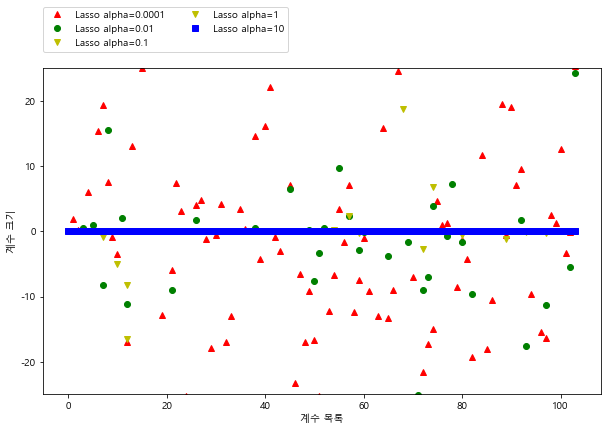

In [61]:
lasso = Lasso(alpha=1).fit(X_train, y_train)

plt.figure(figsize=(10,6))
plt.plot(lasso00001.coef_, "r^", label="Lasso alpha=0.0001")
plt.plot(lasso001.coef_, 'go', label="Lasso alpha=0.01")
plt.plot(lasso01.coef_, 'yv', label="Lasso alpha=0.1")
plt.plot(lasso.coef_, 'yv', label="Lasso alpha=1")
plt.plot(lasso10.coef_, "bs", label="Lasso alpha=10")

plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.ylim(-25, 25)
plt.legend(ncol=2, loc=(0,1.05))
plt.show()

In [62]:
ridge00001 = Ridge(alpha=0.0001).fit(X_train, y_train)
print("학습용 데이터 점수 : {:.2f}".format(ridge00001.score(X_train, y_train)))
print("테스트 데이터 점수 : {:.2f}".format(ridge00001.score(X_test, y_test)))
print("사용한 특성의 수 : ", np.sum(ridge00001.coef_ != 0))

ridge0001 = Ridge(alpha=0.001).fit(X_train, y_train)
print("학습용 데이터 점수 : {:.2f}".format(ridge0001.score(X_train, y_train)))
print("테스트 데이터 점수 : {:.2f}".format(ridge0001.score(X_test, y_test)))
print("사용한 특성의 수 : ", np.sum(ridge0001.coef_ != 0))

ridge001 = Ridge(alpha=0.01).fit(X_train, y_train)
print("학습용 데이터 점수 : {:.2f}".format(ridge001.score(X_train, y_train)))
print("테스트 데이터 점수 : {:.2f}".format(ridge001.score(X_test, y_test)))
print("사용한 특성의 수 : ", np.sum(ridge001.coef_ != 0))

ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("학습용 데이터 점수 : {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 데이터 점수 : {:.2f}".format(ridge01.score(X_test, y_test)))
print("사용한 특성의 수 : ", np.sum(ridge01.coef_ != 0))

ridge1 = Ridge(alpha=1).fit(X_train, y_train)
print("학습용 데이터 점수 : {:.2f}".format(ridge1.score(X_train, y_train)))
print("테스트 데이터 점수 : {:.2f}".format(ridge1.score(X_test, y_test)))
print("사용한 특성의 수 : ", np.sum(ridge1.coef_ != 0))

ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("학습용 데이터 점수 : {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 데이터 점수 : {:.2f}".format(ridge10.score(X_test, y_test)))
print("사용한 특성의 수 : ", np.sum(ridge10.coef_ != 0))

학습용 데이터 점수 : 0.94
테스트 데이터 점수 : 0.79
사용한 특성의 수 :  104
학습용 데이터 점수 : 0.94
테스트 데이터 점수 : 0.81
사용한 특성의 수 :  104
학습용 데이터 점수 : 0.94
테스트 데이터 점수 : 0.81
사용한 특성의 수 :  104
학습용 데이터 점수 : 0.92
테스트 데이터 점수 : 0.82
사용한 특성의 수 :  104
학습용 데이터 점수 : 0.87
테스트 데이터 점수 : 0.81
사용한 특성의 수 :  104
학습용 데이터 점수 : 0.77
테스트 데이터 점수 : 0.73
사용한 특성의 수 :  104


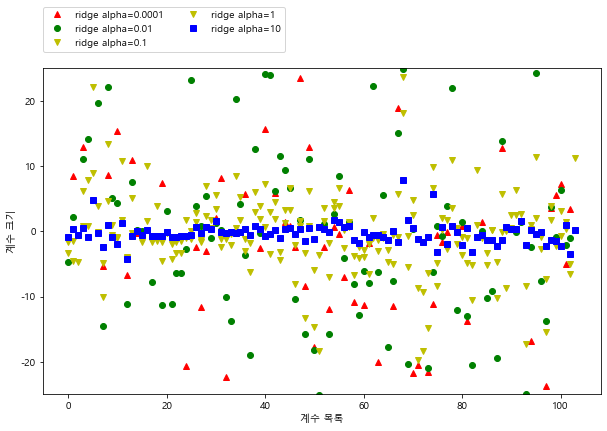

In [65]:
plt.figure(figsize=(10,6))
plt.plot(ridge00001.coef_, "r^", label="ridge alpha=0.0001")
plt.plot(ridge001.coef_, 'go', label="ridge alpha=0.01")
plt.plot(ridge01.coef_, 'yv', label="ridge alpha=0.1")
plt.plot(ridge1.coef_, 'yv', label="ridge alpha=1")
plt.plot(ridge10.coef_, "bs", label="ridge alpha=10")

plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.ylim(-25, 25)
plt.legend(ncol=2, loc=(0,1.05))
plt.show()